#  Build Non-Linear Models Part 2

### Generalized Additive Models (GAMs)


In [2]:
import pandas as pd

data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/train.csv")
test_data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/test.csv")

# Check for missing values
print(data.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [3]:
print(data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  obje

In [4]:

# Convert 'Sex' to dummy variables

data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)


In [5]:
print(data.columns)
print(test_data.columns)


Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')
Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_I', 'Sex_M'],
      dtype='object')


In [6]:
import pandas as pd

# Convert all object columns to numeric where possible
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle NaN values (optional) - e.g., fill NaN with column mean
data.fillna(data.mean(), inplace=True)

# Verify the data types
print(data.dtypes)



id                  int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
Sex_I                bool
Sex_M                bool
dtype: object


In [7]:
print(data.head())

   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11  False  False  
1        0.3200     11  False  False  
2        0.0050      6   True  False  
3        0.2500     10  False   True  
4        0.1975      9   True  False  


In [8]:
# Check for missing values
print(data.isnull().sum())


id                0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
Sex_I             0
Sex_M             0
dtype: int64


In [9]:
print(test_data.head())

      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  
0          0.3125        0.3005  False   True  
1          0.2195        0.2750  False   True  
2          0.1845        0.2405  False   True  
3          0.1865        0.2350  False   True  
4          0.0670        0.1050   True  False  


In [10]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['Rings'])  # Features
y = data['Rings']                 # Target variable


In [11]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
 9   Sex_I           90615 non-null  bool   
 10  Sex_M           90615 non-null  bool   
dtypes: bool(2), float64(7), int64(2)
memory usage: 6.4 MB
None


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data (don't fit again)
X_test_scaled = scaler.transform(X_test)

#

X_test_scaled_original=scaler.transform(test_data)


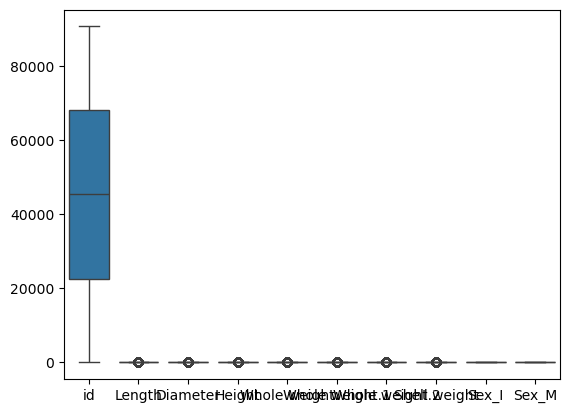

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplot
sns.boxplot(data=X_train)
plt.show()


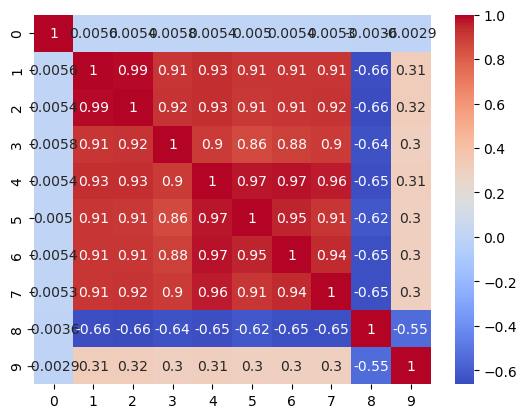

In [15]:
corr_matrix = pd.DataFrame(X_train_scaled).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [17]:
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error

# Initialize the GAM model with smooth terms for each feature
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8))

# Fit the model using grid search for hyperparameter tuning
gam.gridsearch(X_train_scaled, y_train)

# Print the model summary
gam.summary()


100% (11 of 11) |########################| Elapsed Time: 0:00:37 Time:  0:00:370:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    107.2932
Link Function:                     IdentityLink Log Likelihood:                               -169985.4154
Number of Samples:                        72492 AIC:                                           340187.4173
                                                AICc:                                          340187.7443
                                                GCV:                                                3.6362
                                                Scale:                                              3.6265
                                                Pseudo R-Squared:                                   0.6394
Feature Function                  Lam

C:\Users\ghimi\AppData\Local\Temp\ipykernel_15412\2477023053.py:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [18]:
print(X_train_poly)

[[ 1.         -0.06212613  1.12526481 ...  0.57389435 -1.05124941
   1.92565986]
 [ 1.         -0.00380697  1.29462748 ...  0.57389435  0.54591646
   0.51930251]
 [ 1.          0.99345443  0.7441988  ...  0.57389435 -1.05124941
   1.92565986]
 ...
 [ 1.          1.20045121  0.10908878 ...  1.74248099 -0.95124905
   0.51930251]
 [ 1.         -1.69681707  1.50633082 ...  0.57389435 -1.05124941
   1.92565986]
 [ 1.         -1.12716592 -1.24581259 ...  1.74248099 -0.95124905
   0.51930251]]


In [19]:
# Make predictions on the test data
y_pred = gam.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')


Mean Squared Error on Test Data: 3.790095169441668


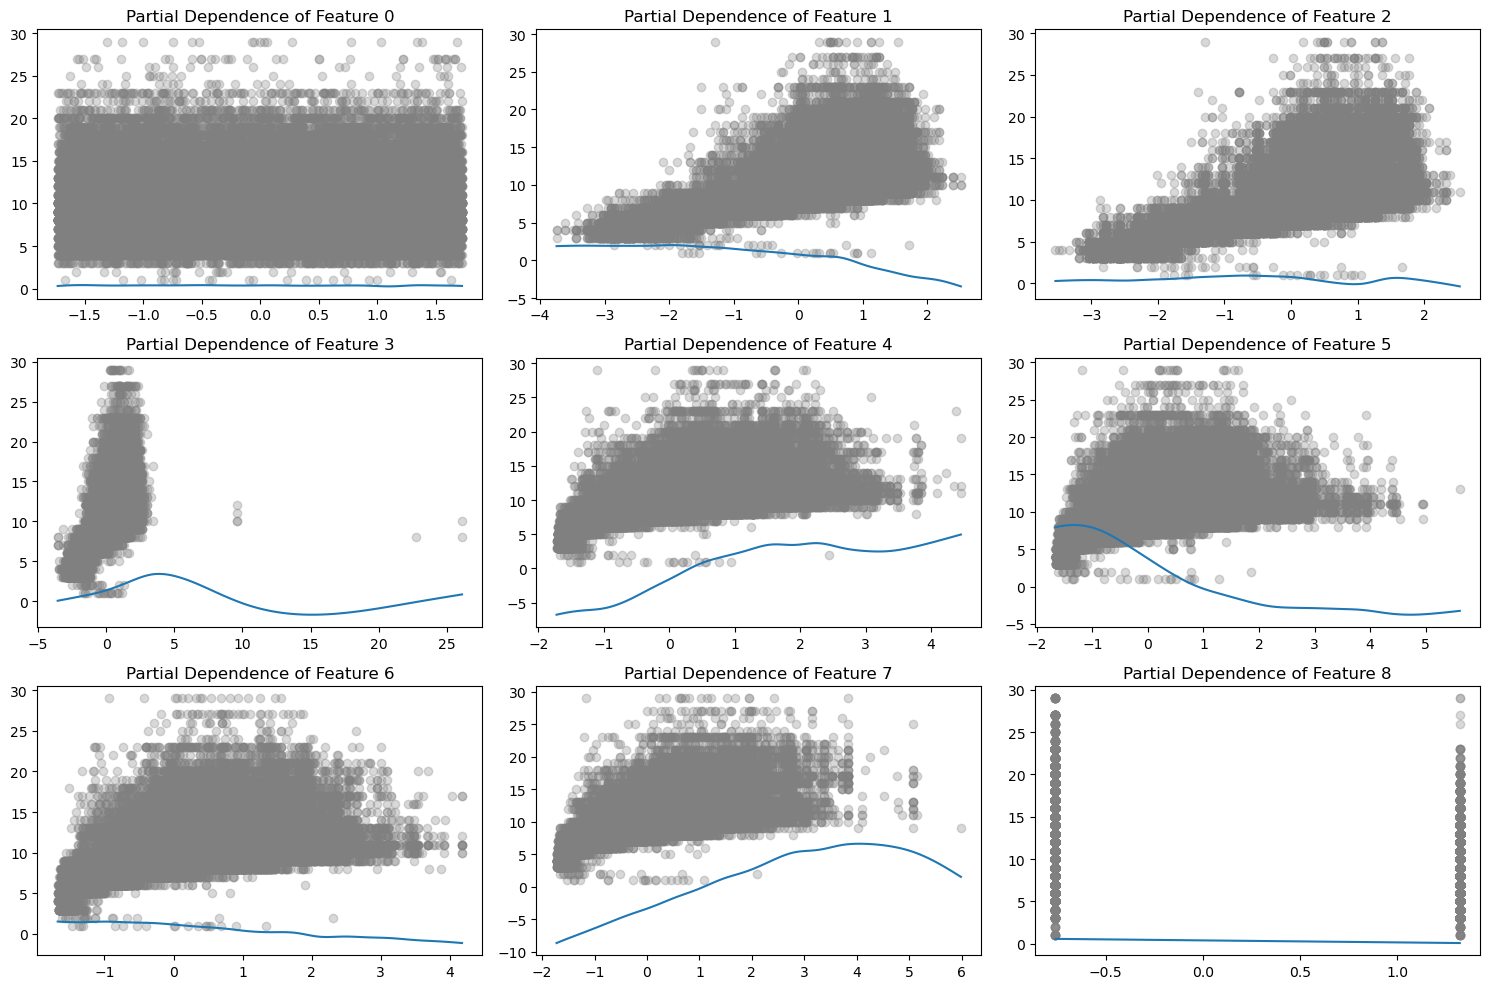

In [20]:
import matplotlib.pyplot as plt

# Plot the partial dependence plots for each feature
plt.figure(figsize=(15, 10))

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue  # Skip the intercept term
    XX = gam.generate_X_grid(term=i)
    plt.subplot(3, 3, i + 1)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.scatter(X_train_scaled[:, i], y_train, alpha=0.3, facecolor='gray')
    plt.title(f'Partial Dependence of Feature {i}')

plt.tight_layout()
plt.show()


In [21]:
# Make predictions on the test data
y_pred_test = gam.predict(X_test_scaled)

# Calculate and print the Mean Squared Error (MSE) on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Test Data: {mse_test}')


Mean Squared Error on Test Data: 3.790095169441668


C:\Users\ghimi\AppData\Local\Temp\ipykernel_15412\2912211372.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


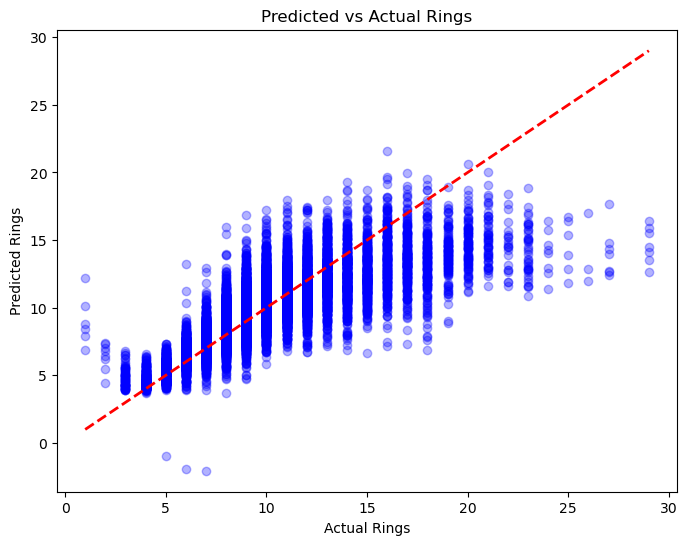

In [22]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Predicted vs Actual Rings')
plt.show()


In [23]:
# Perform grid search for hyperparameter tuning
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8))
gam.gridsearch(X_train_scaled, y_train, lam=[0.1, 1, 10])  # Try different lambda values (regularization strength)
gam.summary()


100% (3 of 3) |##########################| Elapsed Time: 0:00:09 Time:  0:00:090:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     97.5364
Link Function:                     IdentityLink Log Likelihood:                                -170003.692
Number of Samples:                        72492 AIC:                                           340204.4569
                                                AICc:                                          340204.7278
                                                GCV:                                                3.6363
                                                Scale:                                              3.6275
                                                Pseudo R-Squared:                                   0.6393
Feature Function                  Lam

C:\Users\ghimi\AppData\Local\Temp\ipykernel_15412\1707675390.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly1 = poly.fit_transform(X_train_scaled)
X_test_poly2 = poly.transform(X_test_scaled)

# Fit the GAM model again with the new features
gam_poly = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
gam_poly.gridsearch(X_train_poly1, y_train)


100% (11 of 11) |########################| Elapsed Time: 0:00:37 Time:  0:00:370:03


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [25]:
# Use a higher lambda value for stronger regularization
gam_regularized = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8), lam=10)
gam_regularized.gridsearch(X_train_scaled, y_train)


100% (11 of 11) |########################| Elapsed Time: 0:00:34 Time:  0:00:340:03


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + intercept,
   tol=0.0001, verbose=False)

In [26]:
# Make predictions on the test data
y_pred_test = gam_regularized.predict(X_test_scaled)

# Calculate and print the Mean Squared Error (MSE) on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Test Data: {mse_test}')


Mean Squared Error on Test Data: 3.790095169441668


## Prediction Based on GAM& Regularized 

In [28]:
test_preds2 = gam_regularized.predict(X_test_scaled_original)

In [29]:
print(test_preds2)

[ 8.12241394  9.82729685 10.59548454 ... 10.45441208 11.76232838
  6.67700464]


In [ ]:
#Create a submission file in the required format:
gam_regularized = pd.DataFrame({'id': test_data['id'], 'Rings': test_preds2})
gam_regularized.to_csv('C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/gam_regularized.csv', index=False)

### Prediction Based on GAM 

In [31]:
test_preds3=gam.predict(X_test_scaled_original)

In [32]:
print(test_preds3)

[ 8.14303858  9.83053745 10.6058124  ... 11.01775923 12.30110574
  7.26244547]


In [33]:
#Create a submission file in the required format:
gam_result = pd.DataFrame({'id': test_data['id'], 'Rings': test_preds3})
gam_result.to_csv('C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/gam_result.csv', index=False)


In [34]:
print(gam_result)

           id      Rings
0       90615   8.143039
1       90616   9.830537
2       90617  10.605812
3       90618  10.210757
4       90619   7.753537
...       ...        ...
60406  151021   5.385290
60407  151022   8.476661
60408  151023  11.017759
60409  151024  12.301106
60410  151025   7.262445

[60411 rows x 2 columns]


In [35]:
import os
print(os.getcwd())  # This will print the current working directory


C:\Users\ghimi
